In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
df =pd.read_excel("/content/Raisin_Dataset.xlsx", header=None, na_values="?")

In [ ]:
print(df.head)
print(df.isna().sum())

<bound method NDFrame.head of          0                1                2             3           4  \
0     Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea   
1    87524       442.246011       253.291155      0.819738       90546   
2    75166       406.690687       243.032436      0.801805       78789   
3    90856       442.267048       266.328318      0.798354       93717   
4    45928       286.540559       208.760042      0.684989       47336   
..     ...              ...              ...           ...         ...   
896  83248       430.077308       247.838695      0.817263       85839   
897  87350       440.735698       259.293149      0.808629       90899   
898  99657       431.706981       298.837323      0.721684      106264   
899  93523       476.344094       254.176054      0.845739       97653   
900  85609       512.081774       215.271976      0.907345       89197   

            5          6        7  
0      Extent  Perimeter    Class  
1    0.75

In [ ]:
print(df.columns)


Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')


<Axes: xlabel='MajorAxisLength', ylabel='MinorAxisLength'>

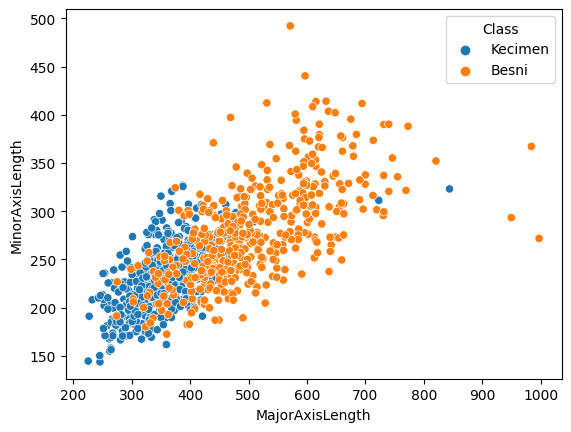

In [ ]:
import seaborn as sns
import pandas as pd

# Load the dataset
data = pd.read_excel("/content/Raisin_Dataset.xlsx")

# Plot a scatter plot of the data
sns.scatterplot(x="MajorAxisLength", y="MinorAxisLength", hue="Class", data=data)



<ipython-input-11-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

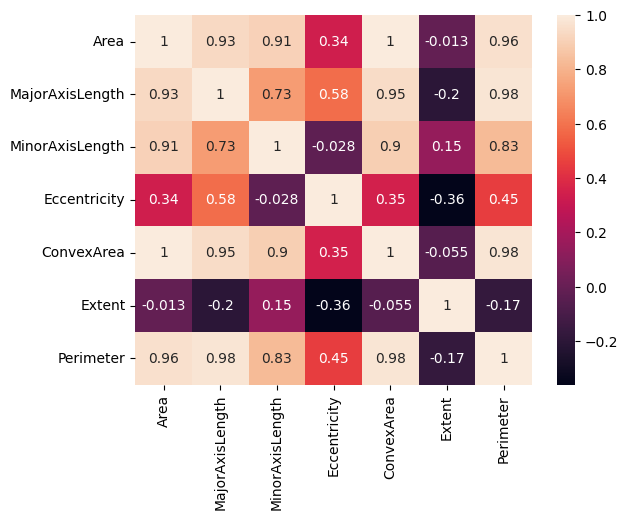

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
#df_i=pd.DataFrame(SimpleImputer(strategy="most_frequent").fit_transform(df))

In [ ]:
df[7]=LabelEncoder().fit_transform(df[7])
df = df.drop([0])
print(df.head)

<bound method NDFrame.head of          0           1           2         3       4         5         6  7
1    87524  442.246011  253.291155  0.819738   90546  0.758651   1184.04  2
2    75166  406.690687  243.032436  0.801805   78789   0.68413  1121.786  2
3    90856  442.267048  266.328318  0.798354   93717  0.637613  1208.575  2
4    45928  286.540559  208.760042  0.684989   47336  0.699599   844.162  2
5    79408   352.19077  290.827533  0.564011   81463  0.792772  1073.251  2
..     ...         ...         ...       ...     ...       ...       ... ..
896  83248  430.077308  247.838695  0.817263   85839  0.668793  1129.072  0
897  87350  440.735698  259.293149  0.808629   90899  0.636476  1214.252  0
898  99657  431.706981  298.837323  0.721684  106264  0.741099  1292.828  0
899  93523  476.344094  254.176054  0.845739   97653  0.658798  1258.548  0
900  85609  512.081774  215.271976  0.907345   89197   0.63202  1272.862  0

[900 rows x 8 columns]>


In [ ]:
#for i in range(0,8):
 # df[i] = df[i].iloc[1:].astype(int)
#from sklearn.preprocessing import MinMaxScaler
#df=pd.DataFrame(MinMaxScaler().fit_transform(df))
#df = df.drop([0])
#print(df)

In [ ]:
target=df[7]
data=df.drop(columns=[7,0])
print(target.shape, data.shape)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(data,target,test_size=0.7)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(900,) (900, 6)
(270, 6) (630, 6) (270,) (630,)


***Gaussian NB***

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(x_train,y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print("Classication Report: \n",classification_report(pred_test,y_test))
acc = accuracy_score(pred_test,y_test)
print("Accuracy Score: ",acc*100,"%")

Classication Report: 
               precision    recall  f1-score   support

           0       0.74      0.92      0.82       248
           2       0.94      0.79      0.86       382

    accuracy                           0.84       630
   macro avg       0.84      0.85      0.84       630
weighted avg       0.86      0.84      0.84       630

Accuracy Score:  84.12698412698413 %


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Load the dataset
data = pd.read_excel("/content/Raisin_Dataset.xlsx")

# Split the data into features and target
X = df.drop(columns=[7,0])
y = df[7]

# Train a machine learning model
# ...

# Make predictions on the test set
y_pred = model.predict(x_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[228  80]
 [ 20 302]]


***KNN***

In [ ]:
features =([0, 1, 2, 3, 4, 5, 6, 7])
df2 = df[features]
df2

,0,1,2,3,4,5,6,7
1,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.04,2
2,75166,406.690687,243.032436,0.801805,78789,0.68413,1121.786,2
3,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,2
4,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,2
5,79408,352.19077,290.827533,0.564011,81463,0.792772,1073.251,2
...,...,...,...,...,...,...,...,...
896,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
897,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
898,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
899,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= scaler.fit_transform(df.values)

In [ ]:
from sklearn.model_selection import GridSearchCV
def print_results(df_output):
    df_results = df_output[['params', 'mean_train_score','mean_test_score', 'rank_test_score']]
    df_results.sort_values(by = 'rank_test_score').head(5)
    return df_results.sort_values(by = 'mean_test_score', ascending = False).head(5)
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

grid_search = GridSearchCV(knn_model, param_grid = {
            'n_neighbors' : range(1, 20),
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
            }, cv = 5, return_train_score = True)

grid_search.fit(x_train, y_train)

print_results(pd.DataFrame(grid_search.cv_results_))

,params,mean_train_score,mean_test_score,rank_test_score
63,"{'algorithm': 'brute', 'n_neighbors': 7}",0.848148,0.800000,1
44,"{'algorithm': 'kd_tree', 'n_neighbors': 7}",0.848148,0.800000,1
6,"{'algorithm': 'auto', 'n_neighbors': 7}",0.848148,0.800000,1
25,"{'algorithm': 'ball_tree', 'n_neighbors': 7}",0.848148,0.800000,1
26,"{'algorithm': 'ball_tree', 'n_neighbors': 8}",0.840741,0.796296,5


In [ ]:
knn_model = KNeighborsClassifier(algorithm=  'ball_tree', n_neighbors= 14)
knn_model.fit(x_train, y_train)
knn_model.score(x_test, y_test)

0.8063492063492064

***SVM***

In [ ]:
from sklearn import svm

from sklearn.model_selection import GridSearchCV
svc_model = svm.SVC(verbose = False)

grid_search = GridSearchCV(svc_model, param_grid = {
                'kernel' : ['linear', 'rbf', 'poly'],
                'degree' : [2,3,4,5,6],
                'C' : [1,2,5]
            }, 
            cv = 5, return_train_score = True)


grid_search.fit(x_train, y_train)
print_results(pd.DataFrame(grid_search.cv_results_))

,params,mean_train_score,mean_test_score,rank_test_score
24,"{'C': 2, 'degree': 5, 'kernel': 'linear'}",0.82963,0.837037,1
18,"{'C': 2, 'degree': 3, 'kernel': 'linear'}",0.82963,0.837037,1
15,"{'C': 2, 'degree': 2, 'kernel': 'linear'}",0.82963,0.837037,1
27,"{'C': 2, 'degree': 6, 'kernel': 'linear'}",0.82963,0.837037,1
21,"{'C': 2, 'degree': 4, 'kernel': 'linear'}",0.82963,0.837037,1


In [ ]:
svc_model = svm.SVC(C = 5, degree= 6, kernel= 'linear')
svc_model.fit(x_train, y_train)
svc_model.score(x_test, y_test)

0.8587301587301587

***RandomForestClassifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(verbose = 0)

grid_search = GridSearchCV(rf_model, param_grid = {
                'n_estimators' : range(5,51,5),
                'criterion': ['gini', 'entropy'],
                'max_depth' : range(5, 20, 1)
            }, 
            cv = 5, return_train_score = True)


grid_search.fit(x_train, y_train)

print_results(pd.DataFrame(grid_search.cv_results_))

,params,mean_train_score,mean_test_score,rank_test_score
91,"{'criterion': 'gini', 'max_depth': 14, 'n_esti...",0.988889,0.862963,1
11,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.973148,0.862963,1
140,"{'criterion': 'gini', 'max_depth': 19, 'n_esti...",0.972222,0.855556,3
8,"{'criterion': 'gini', 'max_depth': 5, 'n_estim...",0.959259,0.855556,4
225,"{'criterion': 'entropy', 'max_depth': 12, 'n_e...",0.996296,0.855556,4


In [ ]:
rf_model = RandomForestClassifier(criterion= 'gini', max_depth= 16, n_estimators = 50)
rf_model.fit(x_train, y_train)
rf_model.score(x_test, y_test)

0.8555555555555555

***PERCEPTRON***

In [ ]:
from sklearn.linear_model import Perceptron
model = Perceptron()

In [ ]:
model.fit(x_train, y_train)
from sklearn.metrics import accuracy_score
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print("Accuracy for training: ", accuracy_score(pred_train,y_train))
print("Accuracy for testing: ", accuracy_score(pred_test,y_test))

Accuracy for training:  0.5333333333333333
Accuracy for testing:  0.4857142857142857


***LOGISTIC REGRESSION***

In [ ]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print("Accuracy for training: ", accuracy_score(pred_train,y_train))
print("Accuracy for testing: ", accuracy_score(pred_test,y_test))

Accuracy for training:  0.5055762081784386
Accuracy for testing:  0.49761526232114467


***DecisionTreeClassifier***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

training accuracy :  0.5055762081784386
testing accuracy :  0.49761526232114467


[Text(0.5, 0.75, 'x[5] <= 0.5\nentropy = 1.0\nsamples = 269\nvalue = [134, 135]'),
 Text(0.25, 0.25, 'entropy = 1.0\nsamples = 268\nvalue = [133, 135]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

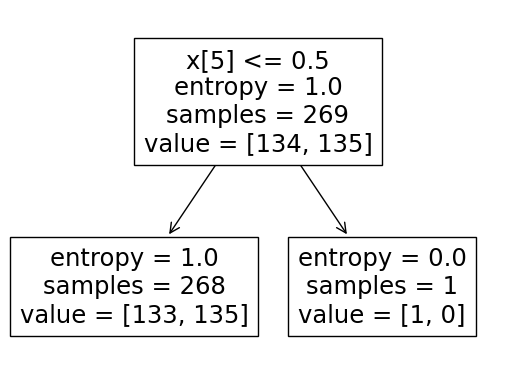

In [ ]:
model_dt=DecisionTreeClassifier(criterion="entropy",max_depth=4).fit(x_train,y_train)
train_pred = model_dt.predict(x_train)
test_pred = model_dt.predict(x_test)
print("training accuracy : ",accuracy_score(train_pred,y_train))
print("testing accuracy : ",accuracy_score(test_pred,y_test))
plot_tree(model_dt)

***SVM***

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 

In [ ]:
model = SVC()
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)
print("training accuracy is : ", accuracy_score(train_pred,y_train))
print("testing accuracy is : ", accuracy_score(test_pred,y_test))

training accuracy is :  0.5055762081784386
testing accuracy is :  0.49761526232114467


In [ ]:
model = SVC(kernel="poly")
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)
print("training accuracy is : ", accuracy_score(train_pred,y_train))
print("testing accuracy is : ", accuracy_score(test_pred,y_test))

training accuracy is :  0.5055762081784386
testing accuracy is :  0.49761526232114467


In [ ]:
model = SVC(kernel="linear")
model.fit(x_train,y_train)
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)
print("training accuracy is : ", accuracy_score(train_pred,y_train))
print("testing accuracy is : ", accuracy_score(test_pred,y_test))

training accuracy is :  0.5055762081784386
testing accuracy is :  0.49761526232114467


***KNeighborsClassifier***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
for k in range(1,10):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train,y_train)
  train_pred=model.predict(x_train)
  test_pred=model.predict(x_test)
  print("training accuracy for k = ",k, " is ",accuracy_score(train_pred,y_train))
  print("testing accuracy for  k = ",k," is ", accuracy_score(test_pred,y_test))


training accuracy for k =  1  is  0.49814126394052044
testing accuracy for  k =  1  is  0.5023847376788553
training accuracy for k =  2  is  0.49814126394052044
testing accuracy for  k =  2  is  0.5023847376788553
training accuracy for k =  3  is  0.5018587360594795
testing accuracy for  k =  3  is  0.49761526232114467
training accuracy for k =  4  is  0.5055762081784386
testing accuracy for  k =  4  is  0.49761526232114467
training accuracy for k =  5  is  0.5055762081784386
testing accuracy for  k =  5  is  0.49761526232114467
training accuracy for k =  6  is  0.49814126394052044
testing accuracy for  k =  6  is  0.5023847376788553
training accuracy for k =  7  is  0.5055762081784386
testing accuracy for  k =  7  is  0.49761526232114467
training accuracy for k =  8  is  0.5055762081784386
testing accuracy for  k =  8  is  0.49761526232114467
training accuracy for k =  9  is  0.5055762081784386
testing accuracy for  k =  9  is  0.49761526232114467


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
pipe=Pipeline([('sc',StandardScaler()),
               ('pca',PCA()),
               ('svmr',SVC(kernel="rbf")),])
pipe.fit(x_train,y_train)
print(pipe.score(x_train,y_train))
print(pipe.score(x_test,y_test))

0.5012376237623762
0.5
